In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [4]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Afame Tech/Churn_Modelling.csv')

# Display the first few rows of the dataset
print(data.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

Data Preprocessing

In [5]:

# Drop unnecessary columns
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [6]:
# Encode categorical variables
label_encoders = {}
for column in ['Geography', 'Gender']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Feature scaling
scaler = StandardScaler()
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
data[numeric_features] = scaler.fit_transform(data[numeric_features])

In [7]:
# Split the dataset into features and target variable
X = data.drop('Exited', axis=1)
y = data['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [9]:
# Predictions and evaluation
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.82      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.82      0.77      2000



In [11]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
# Predictions and evaluation
y_pred_rf = rf.predict(X_test)
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.78      0.47      0.59       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.86      0.87      0.86      2000



In [13]:
# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [14]:
# Predictions and evaluation
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Report:")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [15]:
# Evaluate models using AUC-ROC
# Logistic Regression
log_reg_prob = log_reg.predict_proba(X_test)[:, 1]
log_reg_auc = roc_auc_score(y_test, log_reg_prob)
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log_reg_prob)

# Random Forest
rf_prob = rf.predict_proba(X_test)[:, 1]
rf_auc = roc_auc_score(y_test, rf_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)

# Gradient Boosting
gb_prob = gb.predict_proba(X_test)[:, 1]
gb_auc = roc_auc_score(y_test, gb_prob)
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_prob)

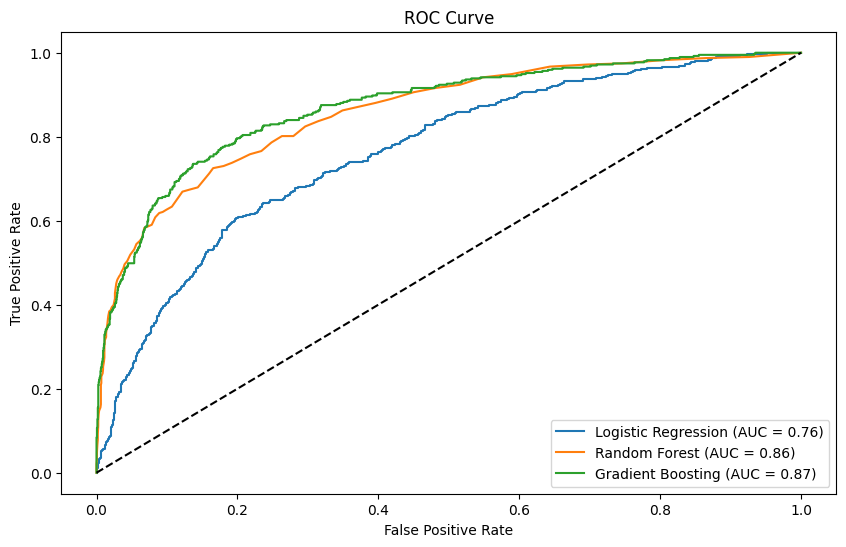

In [16]:
# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {log_reg_auc:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {gb_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [17]:
# Hyperparameter tuning for Random Forest (as an example)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best ROC-AUC Score: {grid_search.best_score_}')

Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best ROC-AUC Score: 0.8583064522991247


For more visualization , here is an example

In [19]:
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# Encode categorical variables
label_encoders = {}
for column in ['Geography', 'Gender']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [21]:
# Feature scaling
scaler = StandardScaler()
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
data[numeric_features] = scaler.fit_transform(data[numeric_features])

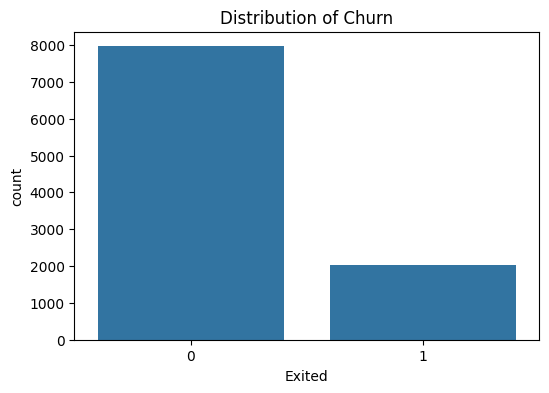

In [22]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=data)
plt.title('Distribution of Churn')
plt.show()

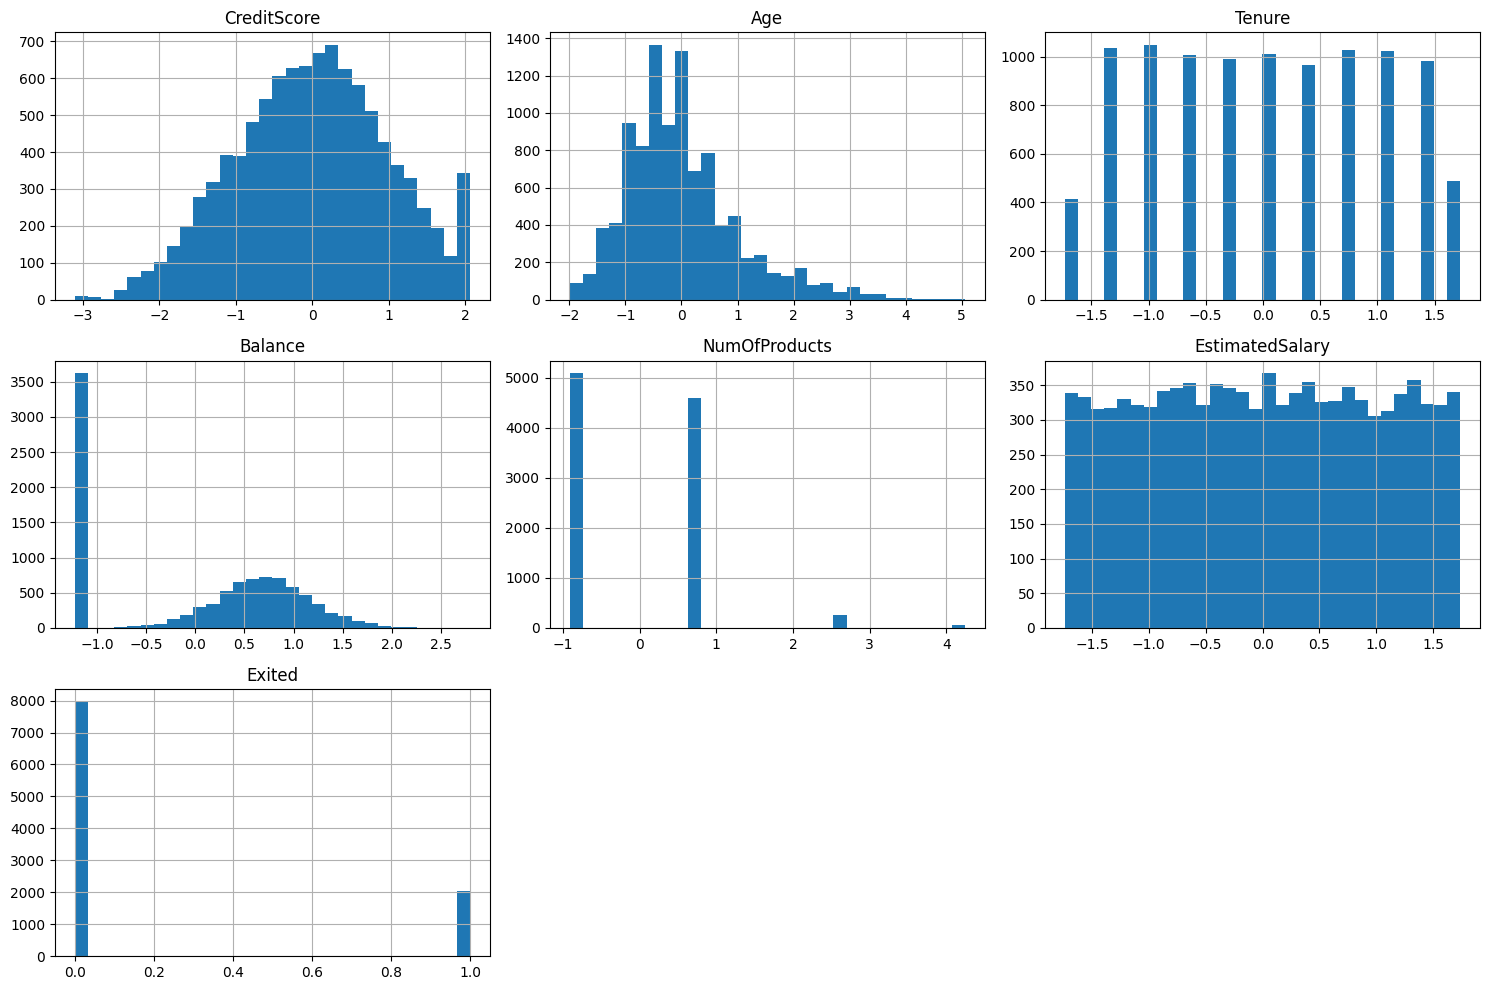

In [23]:
# Visualize the distribution of numerical features
data[numeric_features + ['Exited']].hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

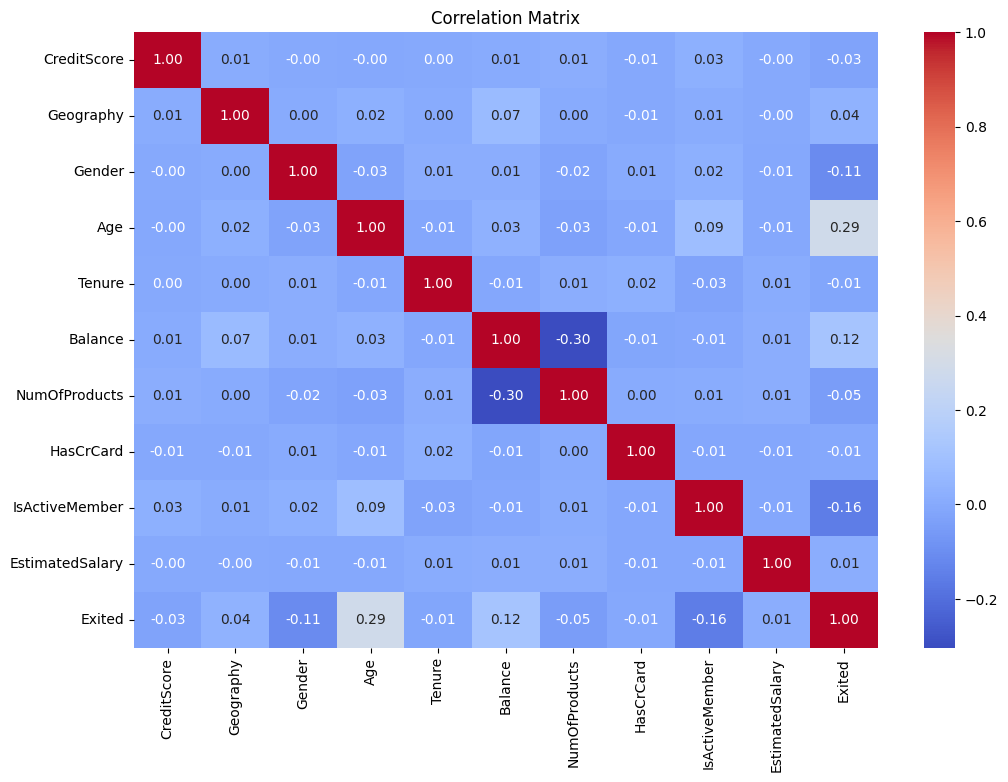

In [24]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [25]:
# Split the dataset into features and target variable
X = data.drop('Exited', axis=1)
y = data['Exited']

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Train a Random Forest model to get feature importance
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
# Get feature importance
feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)


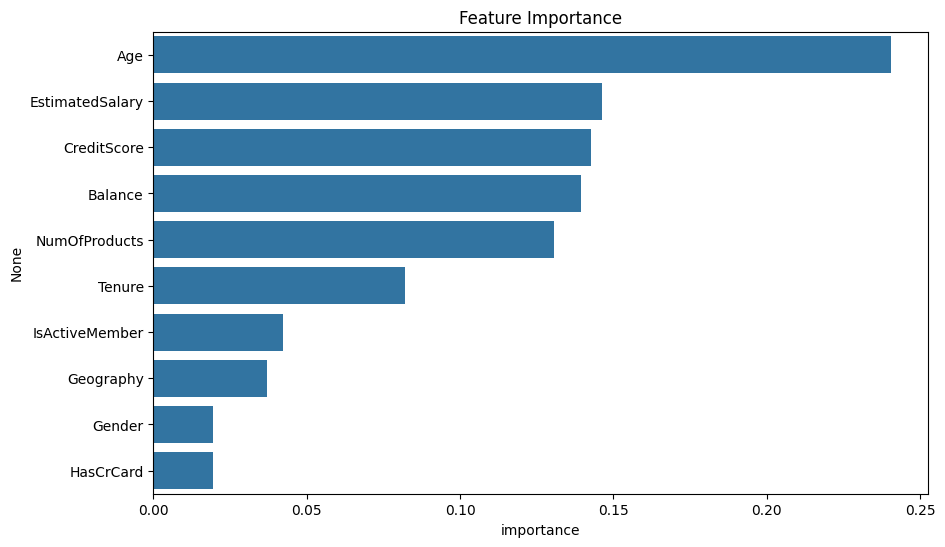

In [29]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.importance, y=feature_importances.index)
plt.title('Feature Importance')
plt.show()